In [2]:
import os
from solutions import *
from utils import *

DATA_PATH = os.path.join("./", 'data')
TRAJECTORY_1_PATH = os.path.join(DATA_PATH, '10.npz')
TRAJECTORY_2_PATH = os.path.join(DATA_PATH, '03.npz')

# Path 10

### Load Data

In [2]:
timestamp, features, linear_velocity, angular_velocity, K, b, imu_T_cam = load_data(TRAJECTORY_1_PATH)

k_s = get_stereo_matrix(K, b)
cam_T_imu = np.linalg.inv(imu_T_cam)
reduced_features = features[:, range(0, features.shape[1], 10), :]

### IMU Localization

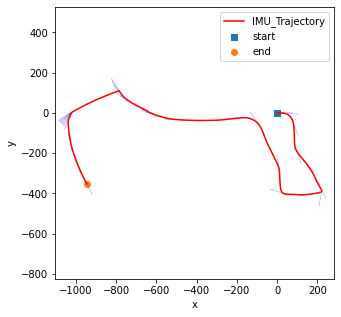

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [3]:
imu_trajectory = imu_localization(timestamp, angular_velocity, linear_velocity)
visualize_trajectory_2d(imu_trajectory, path_name="IMU_Trajectory", show_ori=True)


### Mapping

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


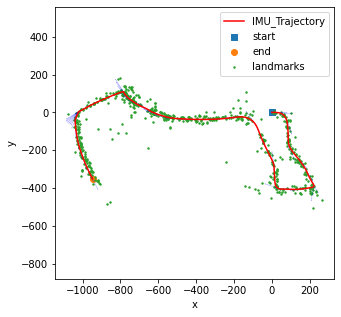

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [4]:
mapping_landmarks = landmark_mapping(timestamp, k_s, cam_T_imu, reduced_features, imu_trajectory, verbose=True)
visualize_trajectory_2d(imu_trajectory, path_name="IMU_Trajectory", show_ori=True, features= mapping_landmarks)

### Visual Inertial SLAM

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


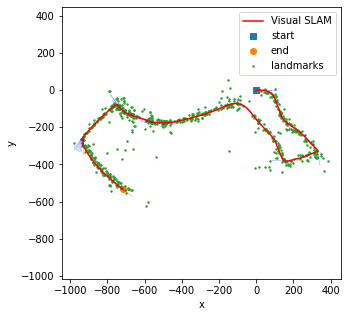

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [5]:
trajectory_v, landmarks_v = visual_inertial_slam(timestamp, angular_velocity, linear_velocity, k_s, cam_T_imu, reduced_features)
visualize_trajectory_2d(trajectory_v, path_name="Visual SLAM", show_ori=True, features= landmarks_v)

### Comparing Results

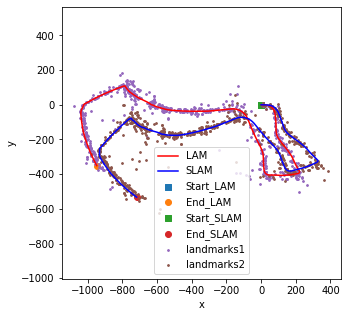

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [6]:
compare_trjectory(imu_trajectory, trajectory_v, path1_name="LAM", path2_name="SLAM", show_ori=False, features1=mapping_landmarks, features2=landmarks_v, save_name="Features")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


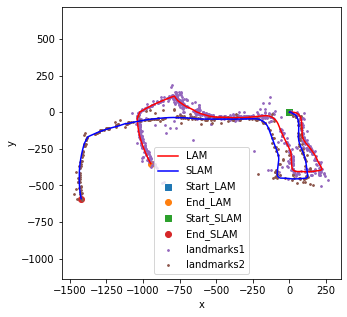

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [7]:
reduced_features = features[:, range(0, features.shape[1], 50), :]
trajectory_v2, landmarks_v2 = visual_inertial_slam(timestamp, angular_velocity, linear_velocity, k_s, cam_T_imu, reduced_features)
compare_trjectory(imu_trajectory, trajectory_v2, path1_name="LAM", path2_name="SLAM", show_ori=False, features1=mapping_landmarks, features2=landmarks_v2, save_name="Features")